### Component 2
#### 04/11/2017
----
#### Read in the Grant data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('DiscGrants96to13.csv', encoding='latin')

In [3]:
data.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN


In [4]:
data.keys()

Index(['LogNumber', 'Institution', 'Program', 'ProgramType', 'ProjectTitle',
       'ProjectType', 'AwardDate', 'InstAddr1', 'InstAddr2', 'InstAddr3',
       'InstCity', 'InstState', 'InstZip', 'AwardOrig', 'AwardTotal',
       'AppMatchAmount', 'ReqAwardAmount', 'ReqMatchAmount', 'Prefix',
       'FirstName', 'LastName', 'OrgType', 'FiscalYear', 'AwardPeriodFr',
       'AwardPeriodTo', 'OrgUnit', 'OUAddr1', 'OUAddr2', 'OUAddr3', 'OUCity',
       'OUState', 'OUZip', 'Latitude', 'Longitude', 'FIPSState', 'FIPSCounty',
       'CensusTract', 'CensusBlock', 'FIPSMCDCode', 'FIPSPlaceCode',
       'CBSACode', 'MetroDivisionCode', 'Description'],
      dtype='object')

In [5]:
data.dropna(subset = ['Latitude', 'Longitude'], axis = 0, inplace = True)

In [6]:
data.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN
5,IA-00-00-0006-00,Hayward Area Historical Society Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,22701 Main Street,NaN,NaN,...,-122.089393,6.0,1.0,435400.0,3003.0,91260.0,33000.0,41860.0,36084.0,NaN


In [7]:
data['ProgramType'].unique()

array(['IA', 'IC', 'IG', 'IL', 'IM', 'IS', 'LE', 'LG', 'LI', 'LT', 'MA',
       'MH', 'ML', 'MN', 'RE', 'ST', 'MP'], dtype=object)

In [8]:
data['ProjectType'].unique()

array([nan, 'Survey of collections', 'Treatment of collections',
       'Provision of optimum environment', 'Impact', 'Institutional',
       'Collections Management', 'Public Dimension', 'Governance',
       'Preservation or Digitization', 'NLG Library Research',
       'Professional Practices',
       'NLG Museum-Advancing Learning Communities', 'NLG Museum Research',
       'NLG LMC', 'NLG-Partnership Nation of Learners Collaboration',
       'NLG Library Research Plan 1', 'NLG Library ADR Plan 2',
       'Education and Training', 'Research and Demonstration',
       'MFA-Sustaining Cultural Heritage',
       'MFA-Supporting Lifelong Learning',
       'MFA-Serving as Centers of Community Engagement',
       'MFA-Engaging Communities', 'MFA-Collections Stewardship',
       'MFA-Building Institutional Capacity', 'NLGMuseums-Out of Cycle',
       'Expanding Educational Services', 'MN-Programming applications',
       'MN-Professional training apps', 'MN-Enhancing museum services',
    

#### Play around with the data

##### The distribtuion of institutions around US

In [9]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon

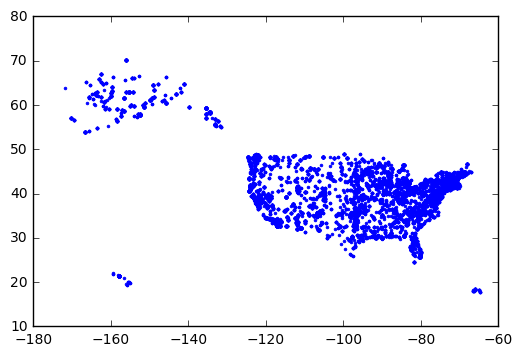

In [10]:
plt.plot(data["Longitude"],data["Latitude"], '.', markersize=4)

In [24]:
lon=data["Longitude"].tolist()
lat=data["Latitude"].tolist()

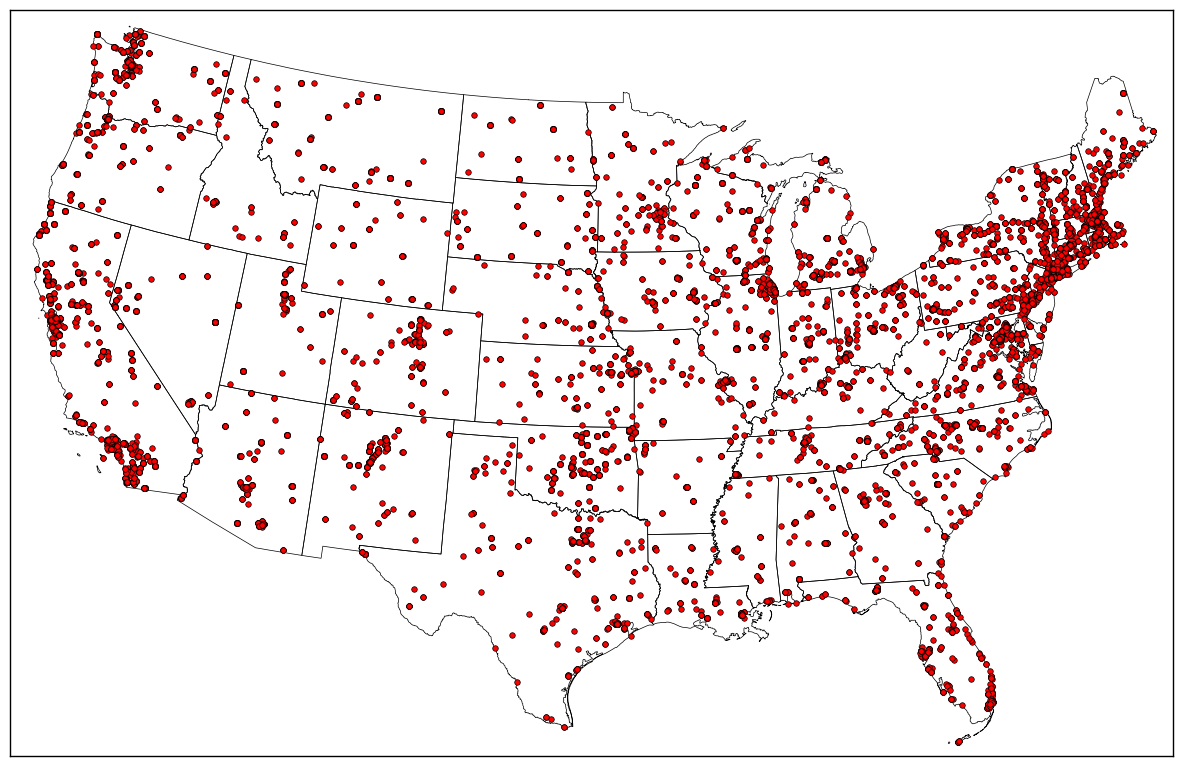

In [26]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
m.readshapefile('st99_d00', name='states', drawbounds=True)
# set a geo coordinate (for example, new york)

x,y = m(lon,lat)

# place it on the map
m.plot(x, y, 'ro', markersize=4)
plt.show()
#States name
#binning-ipywidget

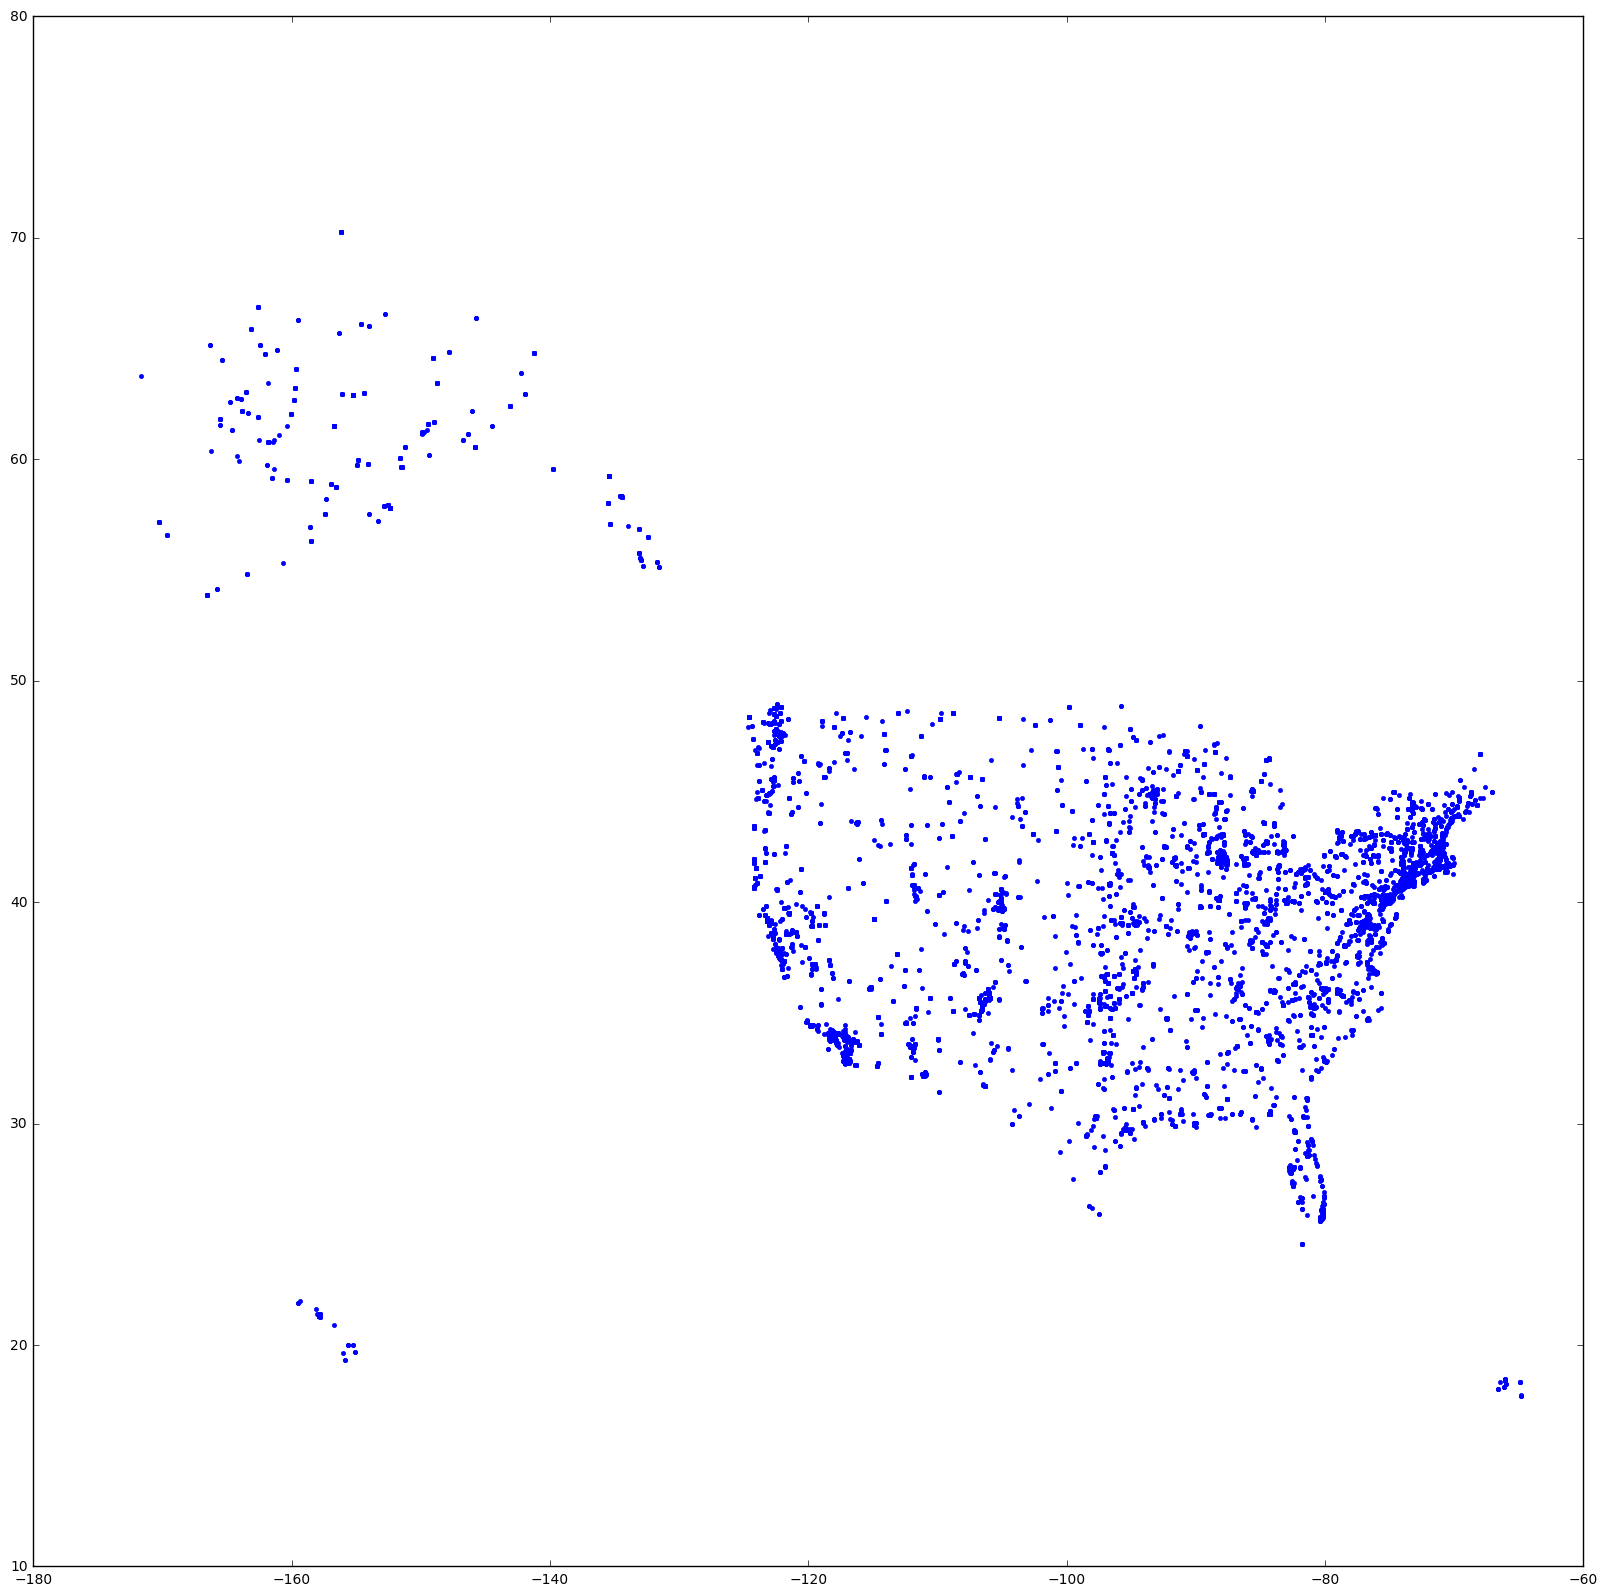

In [12]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.plot(data["Longitude"],data["Latitude"],'.')

##### The distributions of differenty types of grants

In [13]:
plt.rcParams["figure.figsize"] = (15, 15)
def grant_type(column, value):
    good = (data[column] == value)
    data_filtered = data[good]
    plt.plot(data_filtered["Longitude"],data_filtered["Latitude"], '.')

<function __main__.grant_type>

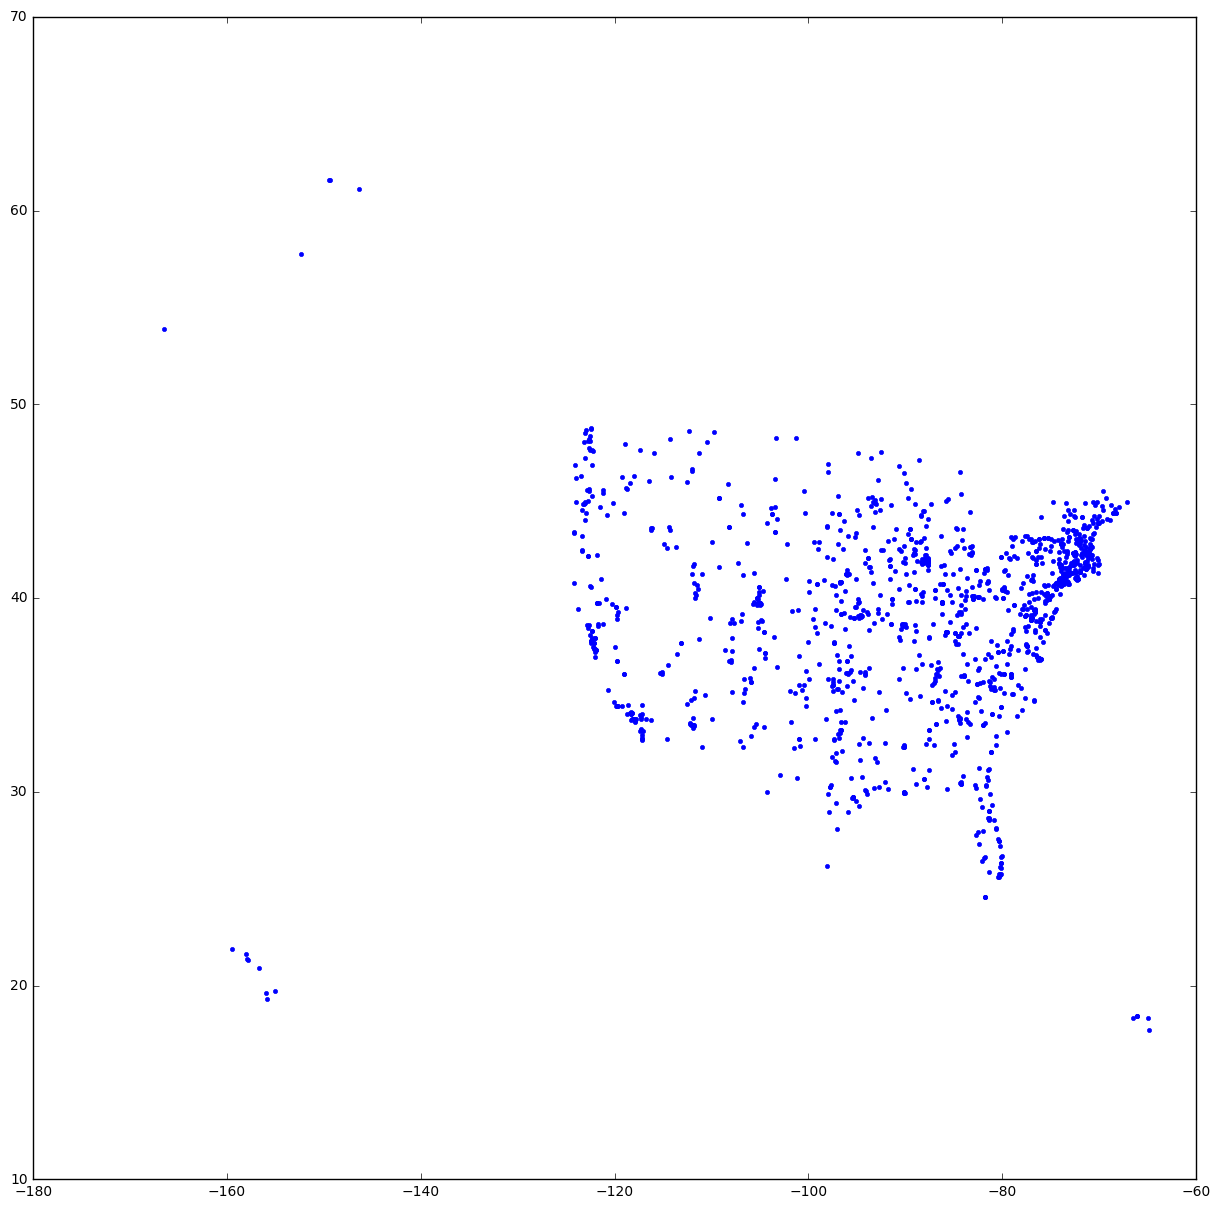

In [14]:
import ipywidgets
ipywidgets.interact(grant_type, column = 'ProgramType',
                   value = data['ProgramType'].unique().tolist())

<function __main__.grant_type>

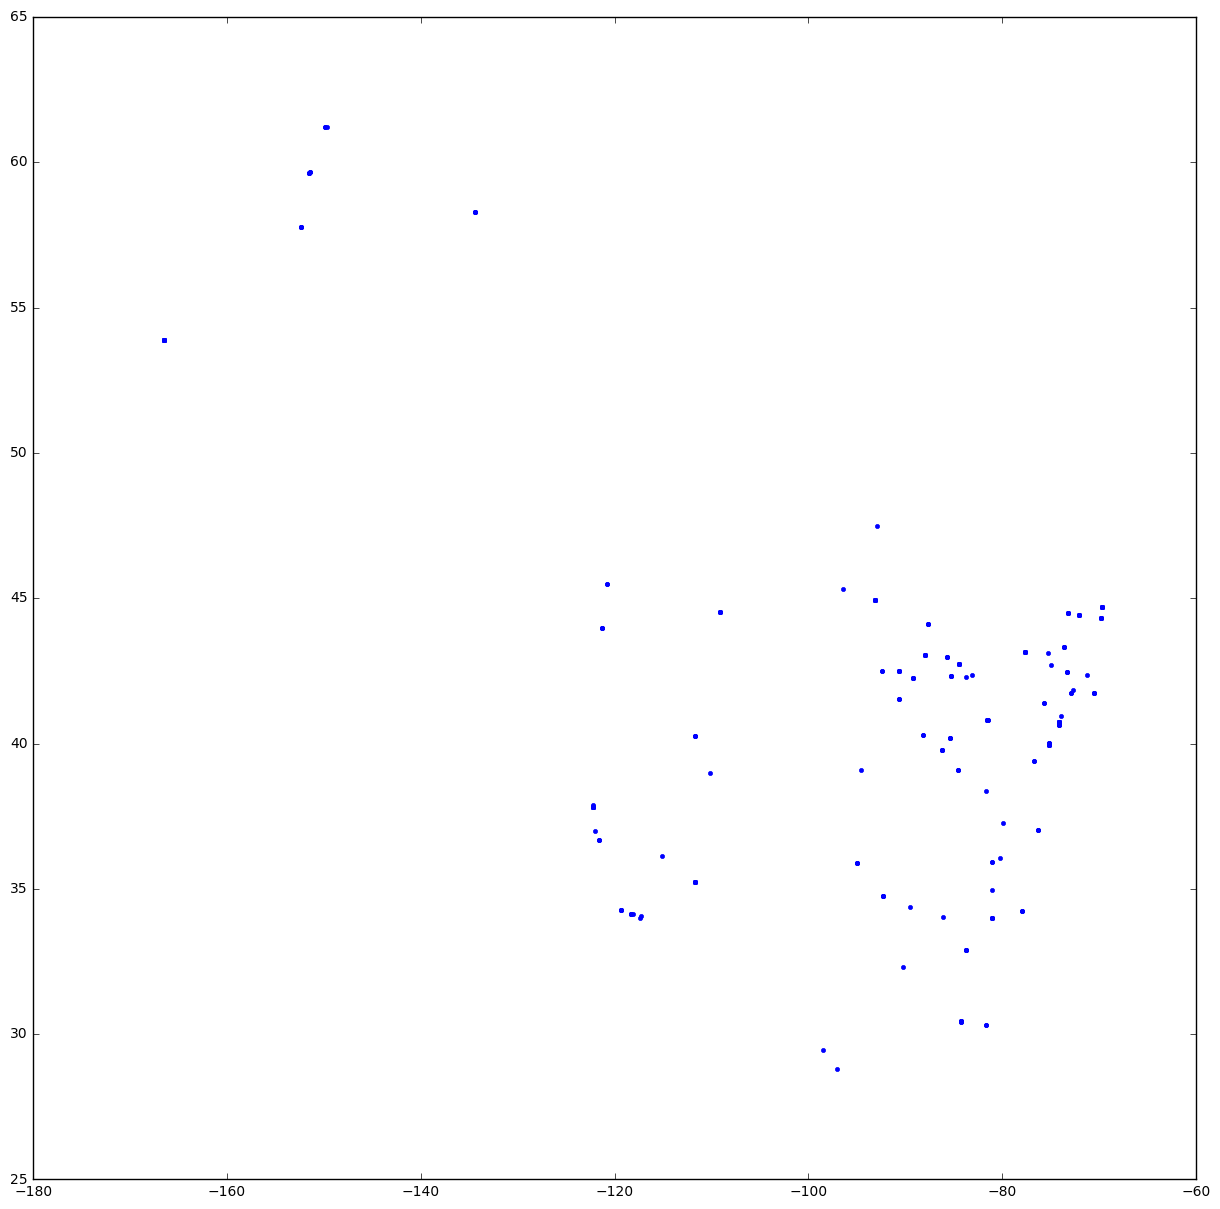

In [15]:
import ipywidgets
ipywidgets.interact(grant_type, column = 'OrgType',
                   value = data['OrgType'].unique().tolist())

In [16]:
plt.rcParams["figure.figsize"] = (15, 15)
def yearloc(year):
    data_filtered = data[data["FiscalYear"]==year]
    plt.plot(data_filtered["Longitude"],data_filtered["Latitude"], '.')


<function __main__.yearloc>

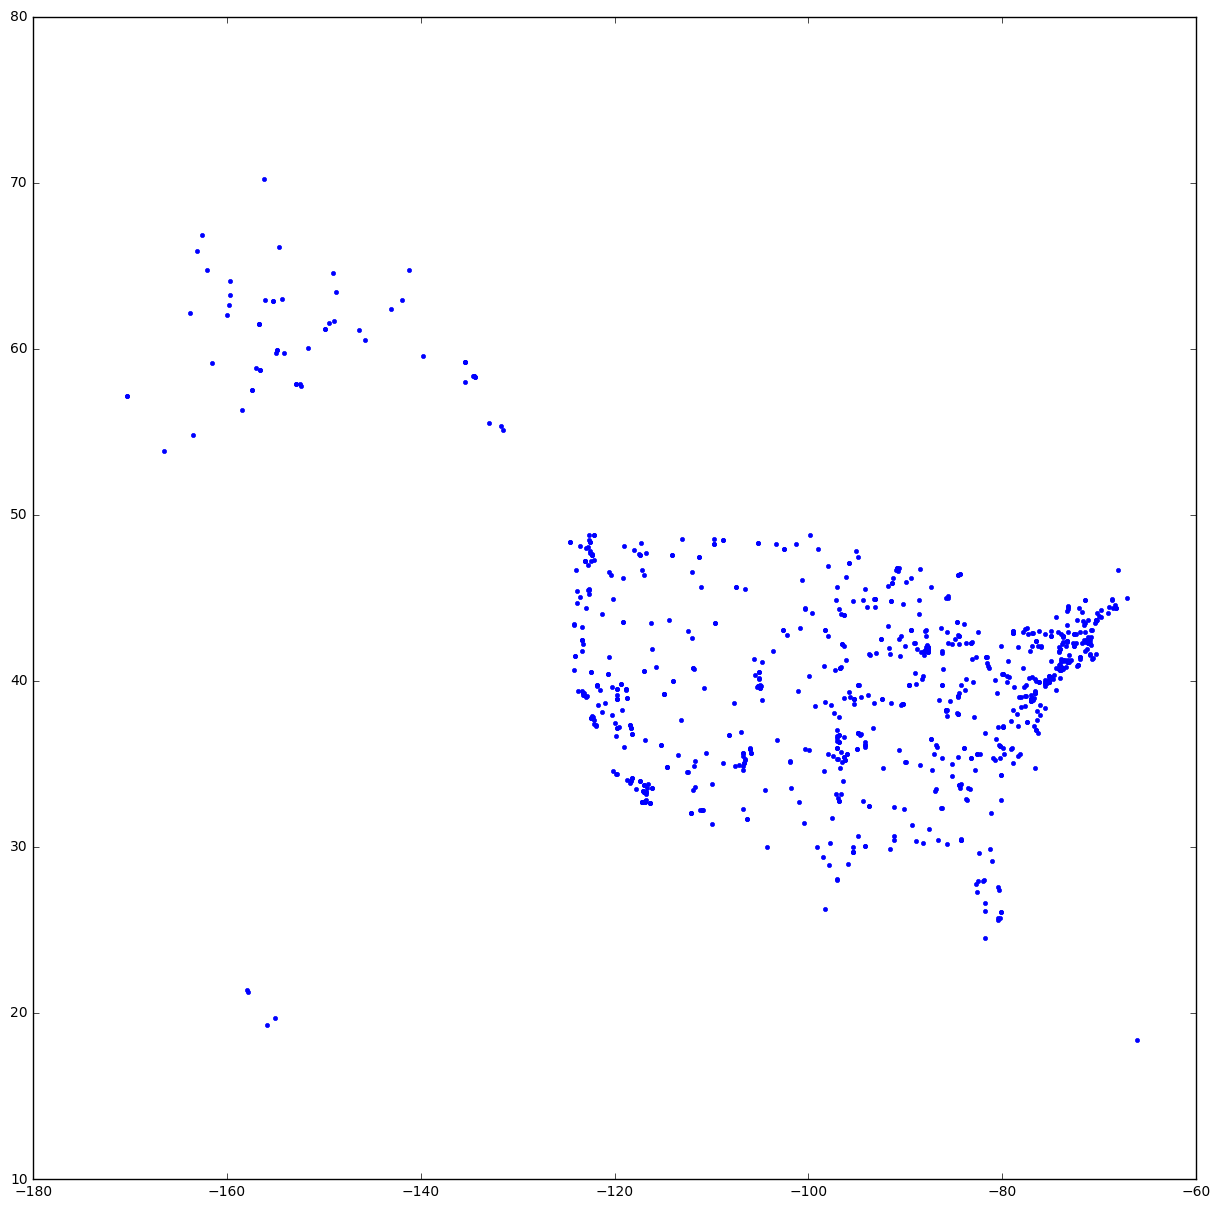

In [17]:
import ipywidgets
ipywidgets.interact(yearloc, year=2001)

In [18]:
import ipywidgets
ipywidgets.interact(yearloc, column = 'FiscalYear',
                   value = data['FiscalYear'].unique().tolist())

ValueError: cannot find widget or abbreviation for argument: 'year'